## Social Media Experiment
This mini-project aims to test my learning of LDA and QDA. First, I take a social media user statistic dataset from Kaggle, and perform some cleaning on the data, first by fixing some errors and then by removing non-essential attributes. Then, I perform EDA on the set before using QDA and LDA to make a classifier.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
sns.set_theme()

In [40]:
##Read the dataset into a dataframe
df = pd.read_csv('train.csv')

### Data Cleanup

In [41]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


       Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  \
count                 1000.000000    1000.000000             1000.000000   
mean                    95.950000       3.321000               39.898000   
std                     38.850442       1.914582               26.393867   
min                     40.000000       1.000000                5.000000   
25%                     65.000000       2.000000               20.000000   
50%                     85.000000       3.000000               33.000000   
75%                    120.000000       4.000000               55.000000   
max                    200.000000       8.000000              110.000000   

       Comments_Received_Per_Day  Messages_Sent_Per_Day  
count                1000.000000            1000.000000  
mean                   15.611000              22.560000  
std                     8.819493               8.516274  
min                     2.000000               8.000000  
25%                     8

<Axes: >

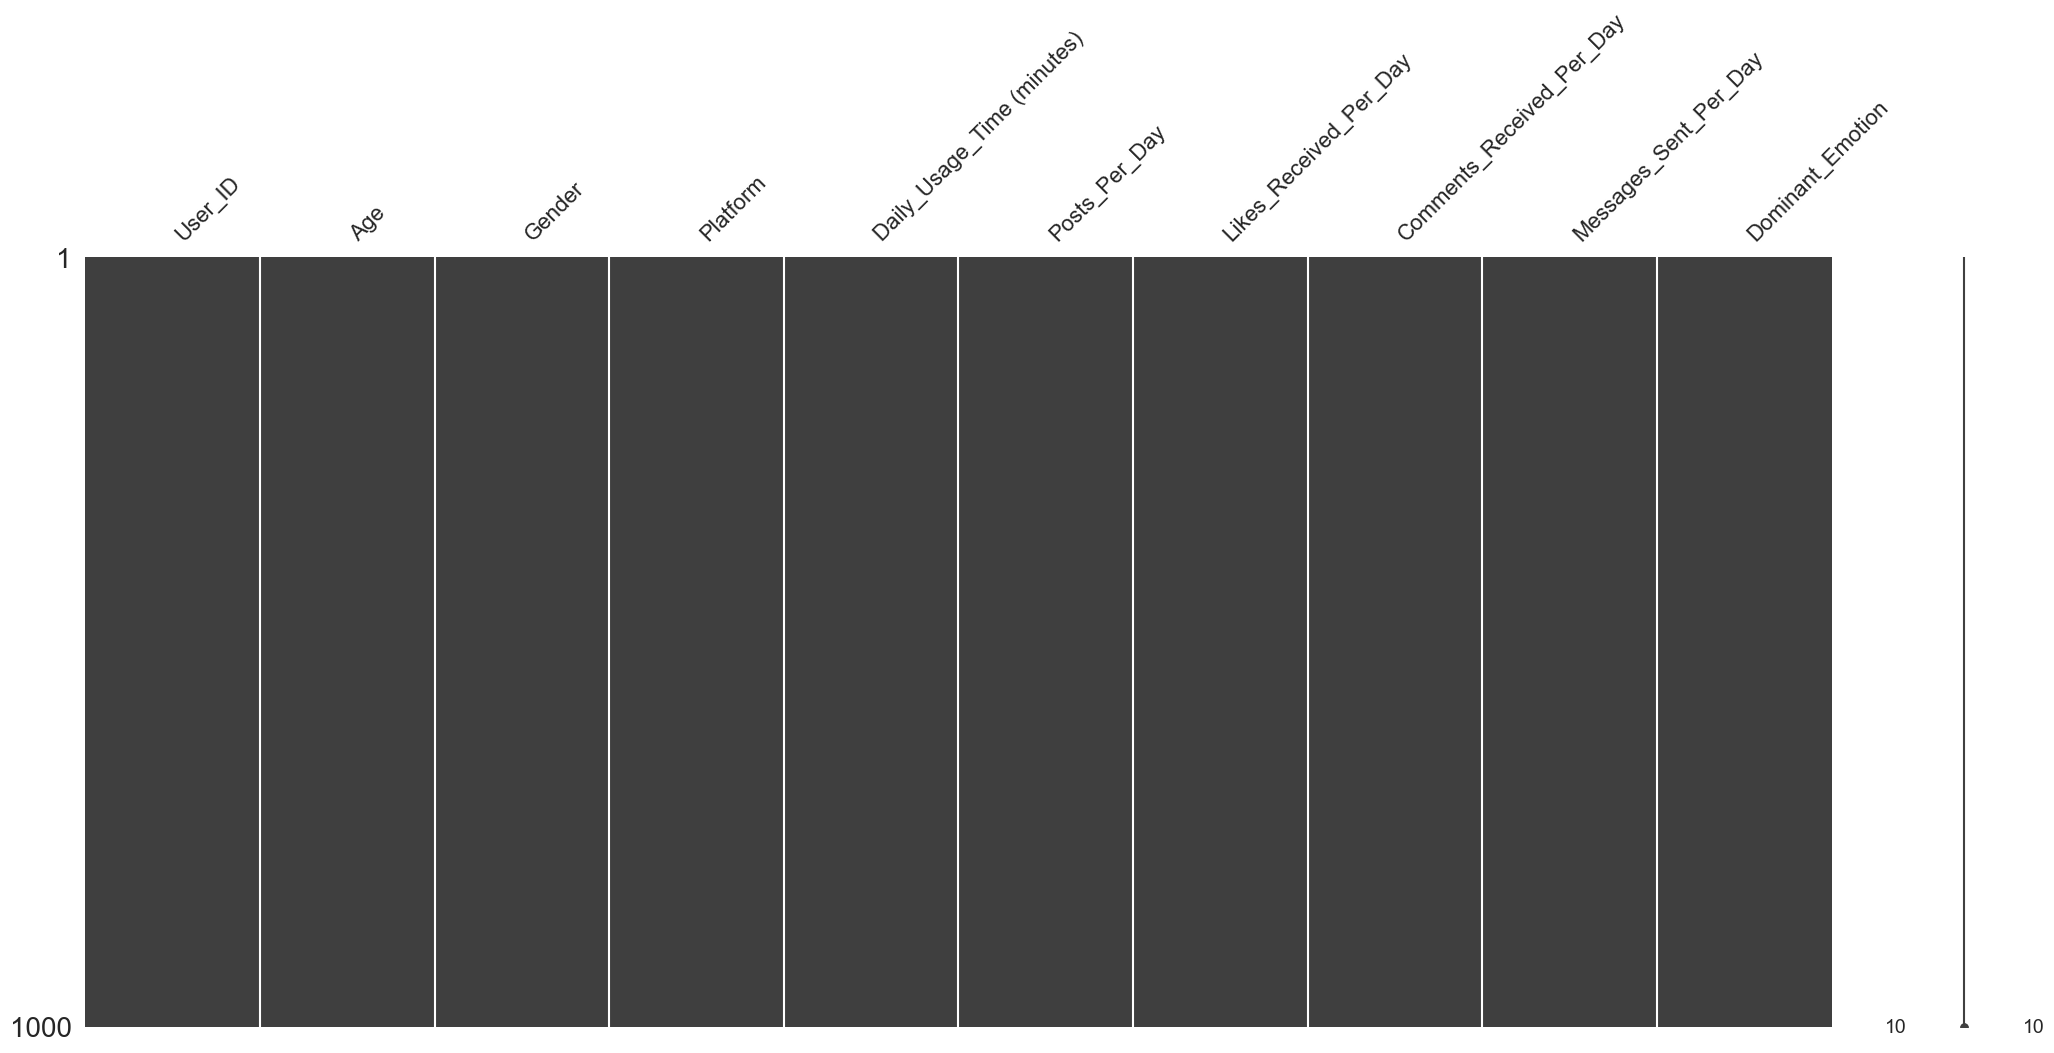

In [42]:
##getting rid of null values and getting data on the distribution of the quantitative attributes
df=df.dropna()
print(df.describe())
msno.matrix(df)

In [43]:
##Some of the data was misinputted, so here the values are fixed
wrong = (df['Age']=='Female') + (df['Age']=='Male') + (df['Age']=='Non-binary')
df.loc[wrong]=df.loc[wrong].rename(columns={'Age' : 'Gender', 'Gender' : 'Age'})
df['Gender'].unique()

array(['Female', 'Male', 'Non-binary'], dtype=object)

In [44]:
##casting some of the quantitative attributes as ints so they can be used in the QDA/LDA
df['User_ID']=df['User_ID'].astype(int)
df['Age']=df['Age'].astype(int)

In [45]:
df=df.drop(columns={'Platform'})

In [46]:
df.dtypes

User_ID                         int64
Age                             int64
Gender                         object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object

### EDA

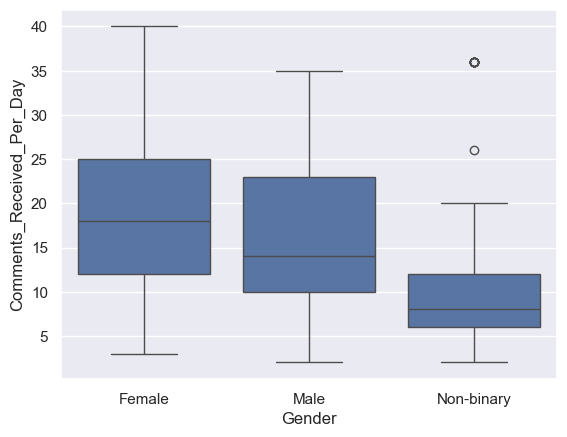

In [47]:
plt.figure()
sns.boxplot(x='Gender', y='Comments_Received_Per_Day', data=df)
plt.show()

<Axes: xlabel='Posts_Per_Day', ylabel='Daily_Usage_Time (minutes)'>

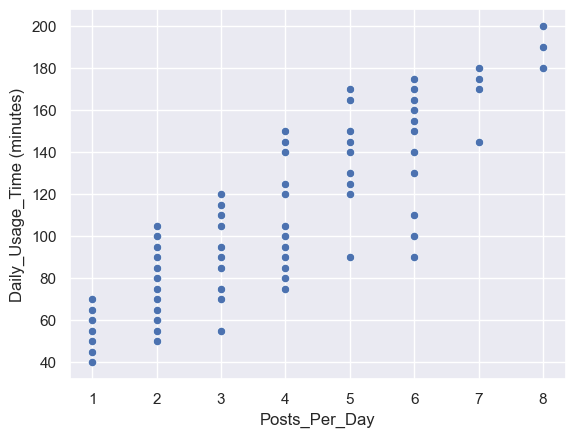

In [48]:
plt.figure()
sns.scatterplot(x='Posts_Per_Day', y='Daily_Usage_Time (minutes)', data=df)

<Axes: xlabel='Dominant_Emotion', ylabel='Daily_Usage_Time (minutes)'>

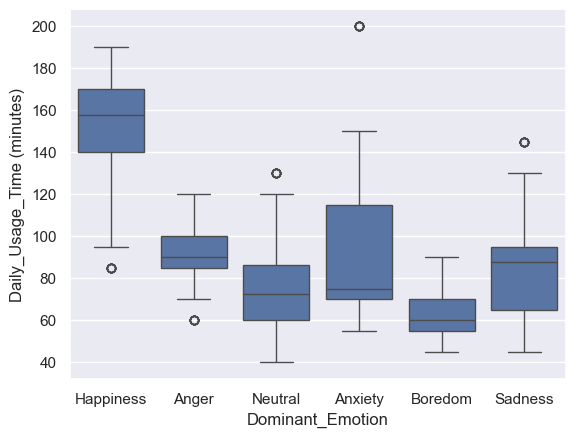

In [49]:
df['Dominant_Emotion'].unique()
plt.figure()
sns.boxplot(x='Dominant_Emotion', y='Daily_Usage_Time (minutes)', data=df)

<Axes: ylabel='count'>

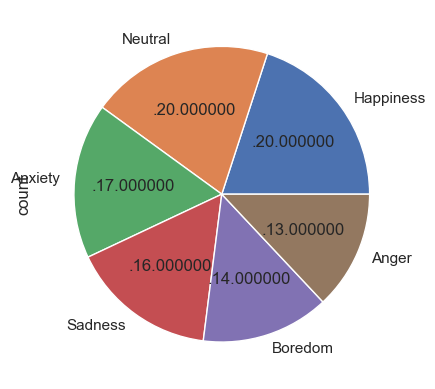

In [50]:
df['Dominant_Emotion'].value_counts().plot(kind="pie", autopct='.%2f')

### Setting up the classifier

In [51]:
##To use the gender data, I create one-hot encodings here
df['Gender_M'] = 0
df['Gender_F'] = 0
df['Gender_NB'] = 0
df.loc[df['Gender']=='Male', 'Gender_M'] = 1
df.loc[df['Gender']=='Female', 'Gender_F'] = 1
df.loc[df['Gender']=='Non-binary', 'Gender_NB'] = 1
df

,User_ID,Age,Gender,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_M,Gender_F,Gender_NB
0,1,25,Female,120.0,3.0,45.0,10.0,12.0,Happiness,0,1,0
1,2,30,Male,90.0,5.0,20.0,25.0,30.0,Anger,1,0,0
2,3,22,Non-binary,60.0,2.0,15.0,5.0,20.0,Neutral,0,0,1
3,4,28,Female,200.0,8.0,100.0,30.0,50.0,Anxiety,0,1,0
4,5,33,Male,45.0,1.0,5.0,2.0,10.0,Boredom,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,33,Non-binary,85.0,4.0,35.0,18.0,18.0,Boredom,0,0,1
997,997,22,Female,70.0,1.0,14.0,6.0,10.0,Neutral,0,1,0
998,998,35,Male,110.0,3.0,50.0,25.0,25.0,Happiness,1,0,0
999,999,28,Non-binary,60.0,2.0,18.0,8.0,18.0,Anger,0,0,1


In [52]:
##Here, I split the data into testing and training strata
X1=df[['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_M', 'Gender_F', 'Gender_NB']].iloc[0:800]
y1=df['Dominant_Emotion'].iloc[0:800]
X2=df[['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_M', 'Gender_F', 'Gender_NB']].iloc[800:1000]
y2=df['Dominant_Emotion'].iloc[800:1000]

In [55]:
##The data is normalized before using the two classifiers
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1=scaler.fit_transform(X1)
X2=scaler.transform(X2)

In [56]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X1,y1)
print(classifier.score(X2, y2))

0.67


/Users/samarth/miniconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier2 = LinearDiscriminantAnalysis()
classifier2.fit(X1,y1)
print(classifier2.score(X2,y2))

0.53


The QDA is slightly more accurate, but both classifiers are successful considering that there are 6 unique emotional states. If the same code is run without the scaling, the QDA performs much worse, while the LDA performs the same. I think that this is because the LDA algorithm assumes the distributions to have the same variances, which would make the scaling meaningless for LDA.